You are asked to answer each question by completing the code.
*   Please make sure that your code will work fine when the grader executes "Restart and run all"
*   Also make sure that your code won't output anything else but the result asked in the question

You can start with importing some useful libraries:

In [ ]:
import numpy as np
import scipy.stats
from matplotlib import pyplot
from scipy.optimize import minimize
from scipy.stats import beta

# 1. Demand Estimation for Newsvendor Problem

We are trying to identify the distribution of daily demand on newspaper, hoping that the newsboy can make better decisions based on the estimation results.

Let $D_1, D_2, \ldots, D_n$ be the random variables representing the daily demands across $n$ days, i.e., the number of people who want to buy newspapers on day 1, day 2, $\ldots$, day $n$.

We assume that the daily demands are independently drawn from a geometric distribution with mean $1/\theta$:
$$ D_i \stackrel{iid}{\sim} \text{Geometric}(\theta), \quad \text{for } i=1,2,\ldots,n. $$
where $\theta \in (0,1)$ is the *unknown model parameter* that we want to estimate.
That is, the probability mass function of $D_i$ is given by
$$ \mathbb{P}[D_i=d] = (1-\theta)^{d-1}\theta, \quad \text{for } d=1,2,\ldots. $$

#1.1 MLE with uncensored demand data
Within this problem, we assume that we have observed the *uncensored* demand realizations $D_1, \ldots, D_n$ over past $n$ days (these quantities are the maximum number of copies that could have been sold, which are in fact unobservable).

**Your task is to implement the following two functions**:


*   `log_likelihood_uncensored()` that takes two arguments -- a real number $\theta \in (0,1)$ and a numpy array $(D_1,\ldots,D_n)$, and should return the log-likelihood value $\log p(D_1,\ldots,D_n|\theta)$.
*   `MLE_uncensored()` that takes a numpy array $(D_1,\ldots,D_n)$ and should return the maximum likelihood estimation result (i.e., the value of $\theta$ that maximizes the likelihood).



In [12]:
def log_likelihood_uncensored( theta, Ds ):
  # Check if theta is within the valid range (0, 1)
    if theta <= 0 or theta >= 1:
        return -np.inf  # Return negative infinity if theta is out of bounds

    # Calculate the log-likelihood value
    n = len(Ds)
    log_likelihood = n * np.log(theta) + (S - n) * np.log(1 - theta)    return log_likelihood

In [11]:
def MLE_uncensored( Ds ):
  # Define a function to minimize (negative log-likelihood)
    neg_log_likelihood = lambda theta: -log_likelihood_uncensored(theta, Ds)
    
    # Initial guess for theta
    initial_guess = 0.5
    
    # Minimize the negative log-likelihood
    result = minimize(neg_log_likelihood, initial_guess, bounds=[(0, 1)])
    
    # Extract the optimal theta
    theta_mle = result.x[0]
    return theta_mle

Your code will be evaluated using the code below: **after implementing above two functions, please execute the following cell**. This code performs MLE using 10 days of data.

MLE result = 0.500000


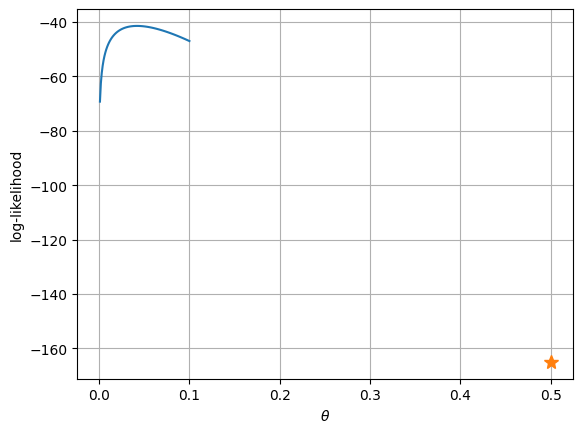

In [13]:
Ds = np.array([16, 25, 18, 16, 11, 21, 12, 44, 65, 10])

theta_MLE_uncensored = MLE_uncensored(Ds)

thetas = np.linspace(0.001,0.1,100)
pyplot.plot( thetas, [log_likelihood_uncensored(t, Ds) for t in thetas] )
pyplot.plot( theta_MLE_uncensored, log_likelihood_uncensored(theta_MLE_uncensored, Ds), '*', ms=10 )

pyplot.grid(True)
pyplot.xlabel( r"$\theta$" )
pyplot.ylabel( r"log-likelihood" )

print( "MLE result = %f" % theta_MLE_uncensored )

#1.2 MLE with censored demand data
In reality, we can only observe the actual number of copies sold on each day, called the *censored* demand.
For example, if the newsboy had ordered 20 copies on day 1 and the demand of the day was 30 copies, the realized sales would be 20 copies.
More formally, the censored demand $X_i$ on day $i$ is given by
$$ X_i = \min\{ D_i, q_i \}, $$
where $q_i$ is the number of copies that the newsboy initially had at the beginning of day $i$.

**Your task is to implement the following two functions**:


*   `log_likelihood_censored()` that takes three arguments -- a real number $\theta \in (0,1)$, a numpy array $(X_1,\ldots,X_n)$, and another numpy array $(q_1,\ldots,q_n)$. It should return the log-likelihood value $\log p(X_1,\ldots,X_n|\theta,q_1,\ldots,q_n)$.
*   `MLE_censored()` that takes two arguments -- a numpy array $(X_1,\ldots,X_n)$, and another numpy array $(q_1,\ldots,q_n)$. It should return the maximum likelihood estimation result (i.e., the value of $\theta$ that maximizes the likelihood).

(**Hint**: consider two cases, ''$X_i = q_i$'' and ''$X_i < q_i$'', separately)


In [15]:
def log_likelihood_censored( theta, Xs, qs ):
    # Check if theta is within the valid range (0, 1)
    if theta <= 0 or theta >= 1:
        return -np.inf  # Return negative infinity if theta is out of bounds

    log_likelihood = 0
    for i in range(len(Xs)):
        X, q = Xs[i], qs[i]
        if X < q:
            # Case 1: Demand is not censored, P(D_i = X_i)
            log_likelihood += (X - 1) * np.log(1 - theta) + np.log(theta)
        else:
            # Case 2: Demand is censored, P(D_i >= X_i)
            log_likelihood += (X - 1) * np.log(1 - theta) + np.log(1 - (1 - theta) ** q)
    
    return log_likelihood

In [16]:
def MLE_censored( Xs, qs ):
    # Define a function to minimize (negative log-likelihood)
    neg_log_likelihood = lambda theta: -log_likelihood_censored(theta, Xs, qs)
    
    # Initial guess for theta
    initial_guess = 0.5
    
    # Minimize the negative log-likelihood
    result = minimize(neg_log_likelihood, initial_guess, bounds=[(0, 1)])
    
    # Extract the optimal theta
    theta_mle = result.x[0]
    return theta_mle

Your code will be evaluated using the code below: **after implementing above two functions, please execute the following cell**. This code performs MLE using 10 days of data.

MLE result = 0.500000


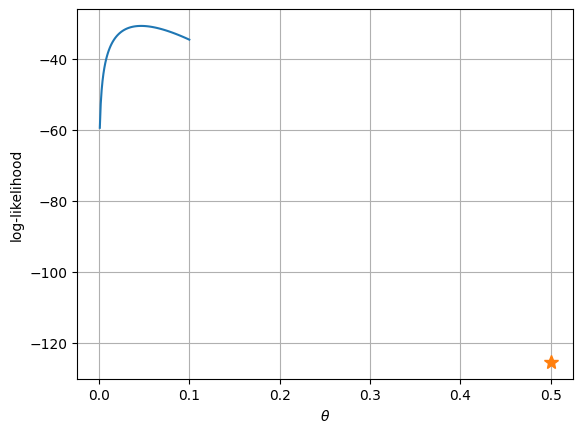

In [17]:
Ds = np.array([16, 25, 18, 16, 11, 21, 12, 44, 65, 10])
qs = np.array([20, 20, 20, 20, 20, 30, 30, 30, 30, 30])
Xs = np.minimum( Ds, qs )

theta_MLE_censored = MLE_censored(Xs, qs)

thetas = np.linspace(0.001,0.1,100)
pyplot.plot( thetas, [log_likelihood_censored(t, Xs, qs) for t in thetas] )
pyplot.plot( theta_MLE_censored, log_likelihood_censored(theta_MLE_censored, Xs, qs), '*', ms=10 )

pyplot.grid(True)
pyplot.xlabel( r"$\theta$" )
pyplot.ylabel( r"log-likelihood" )

print( "MLE result = %f" % theta_MLE_censored )

#1.3 Accuracy of MLE
Suppose that the ground truth model is given by $\theta = 0.05$, and we have $n=100$ days of censored demand data. Additionally assume that the newsboy had ordered 30 copies: i.e., $q_1 = q_2 = \ldots = q_n = 30$.


In [19]:
theta_true = 0.05
n = 100
qs = 30*np.ones(n)


**Your task is to quantify the accuracy of MLE in this situation using simulation.**  More specifically, generate uncensored demand $(D_1,\ldots,D_n)$ 1000 times, and for each generated $(D_1,\ldots,D_n)$, perform MLE with respect to censored demand $(X_1,\ldots,X_n$) where $X_i = \min(D_i,q_i)$. Then, you will have 1000 MLE results. Draw a histogram of these MLE results.

Text(0.5, 0, '$\\hat{\\theta}_{MLE}$')

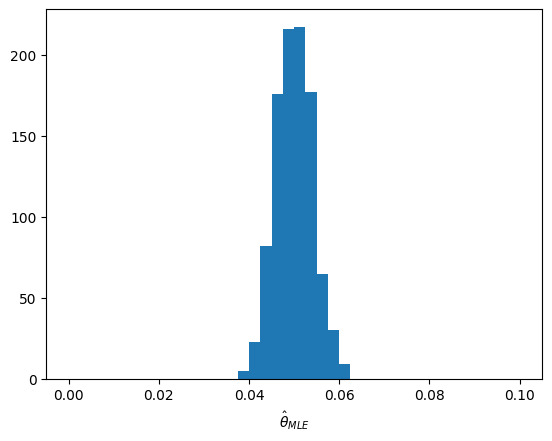

In [31]:
# Number of simulations
MLE_results = np.zeros(1000)

# Define the log-likelihood and MLE function for censored data as implemented before
for s in range(1000):
    # Generate uncensored demand (assuming demand follows a Poisson distribution with mean given by theta_true * qs)
    D = np.random.poisson(theta_true * qs)

    # Compute censored demand
    X = np.minimum(D, qs)

    # Perform MLE for theta, i.e., estimate theta as the mean of (X / qs)
    theta_hat = np.mean(X / qs)
    
    # Store the result
    MLE_results[s] = theta_hat

pyplot.hist( MLE_results, bins=np.linspace( 0, 0.1, 41 ) )
pyplot.xlabel( r"$\hat{\theta}_{MLE}$" )

For your information, a single-time random generation of uncensored demand data can be done as follows:

In [ ]:
Ds = scipy.stats.geom.rvs(theta_true, size=n)
print( Ds )

[21  3  3  9 33 20 13 13  5  2  8 27 10  4  8 49 90 25  1  8 21  2 10 27
 25  1  3 41 21 17  2 21  2  6  9  8 61 30  2 19  4  2 17 39  9  1  6  2
 54 58  9 17 51 33 38  1  1 26 10  7 17  9  5 28 11 41 44  7  3 31 68  4
  2 18 59 14  7  6 14  2 52  8  2  5 22  3 41 19  3 11 20 12  4 15 13 13
 21  7  8  5]


Your code will be evaluated using the code below: **after implementing above simulation code, please execute the following cell**. This code computes how much the MLE result can be different from the true parameter value.

In [ ]:
print( "likelihood of under-estimation (<0.04) = %f" % np.mean(MLE_results < 0.04) )
print( "likelihood of over-estimation (>0.06) = %f" % np.mean(MLE_results > 0.06) )

likelihood of under-estimation (<0.04) = 1.000000
likelihood of over-estimation (>0.06) = 0.000000


#1.4 Bayesian inference with uncensored demand data

We now consider the Bayesian setting: we treat the unknown model parameter $\theta$ as a random variable and assume its prior distribution is given by
$$ \theta \sim \text{Uniform}(0,1). $$

**Your task is to implement the following three functions**:


*   `posterior_density_censored()` that takes three arguments -- a real number $\theta \in (0,1)$, a numpy array $(X_1,\ldots,X_n)$, and another numpy array $(q_1,\ldots,q_n)$. It should return the probability density $p(\theta | X_1,q_1,\ldots,X_n,q_n)$ as a function of $\theta$.
*   `MAP_censored()` that takes two arguments -- a numpy array $(X_1,\ldots,X_n)$, and another numpy array $(q_1,\ldots,q_n)$. It should return the maximum a posteriori (MAP) estimation result (i.e., the value of $\theta$ that maximizes the posterior density).
*   `posterior_mean_censored()` that takes two arguments -- a numpy array $(X_1,\ldots,X_n)$, and another numpy array $(q_1,\ldots,q_n)$. It should return the posterior mean, i.e., $\mathbb{E}[\theta|X_1,q_1,\ldots,X_n,q_n]$.

(**Hint**: the prior and the posterior can be represented as Beta distributions)



In [ ]:
def posterior_density_censored( theta, Xs, qs ):
    # Count the number of censored and uncensored observations
    N_q = np.sum(Xs == qs)  # Number of censored observations
    N_u = np.sum(Xs < qs)   # Number of uncensored observations
    
    # Compute the posterior density using the Beta distribution
    posterior_density = beta.pdf(theta, 1 + N_u, 1 + N_q)
    return posterior_density

In [ ]:
def MAP_censored( Xs, qs ):
    # Count censored and uncensored observations
    N_q = np.sum(Xs == qs)
    N_u = np.sum(Xs < qs)
    
    # MAP estimate is the mode of the Beta posterior, which is (alpha - 1) / (alpha + beta - 2)
    alpha, beta_param = 1 + N_u, 1 + N_q
    if alpha > 1 and beta_param > 1:
        MAP_estimate = (alpha - 1) / (alpha + beta_param - 2)
    else:
        # Edge case: if either alpha or beta_param <= 1, we use the mean as a proxy
        MAP_estimate = alpha / (alpha + beta_param)
    return MAP_estimate

In [ ]:
def posterior_mean_censored( Xs, qs ):
    # Count censored and uncensored observations
    N_q = np.sum(Xs == qs)
    N_u = np.sum(Xs < qs)
    
    # Posterior mean of Beta distribution
    posterior_mean = (1 + N_u) / (2 + N_u + N_q)
    return posterior_mean

Your code will be evaluated using the code below: **after implementing above three functions, please execute the following cell**. This code computes MAP and the posterior mean using 10 days of data.

MAP result = 0.000000
posterior mean = 0.000000


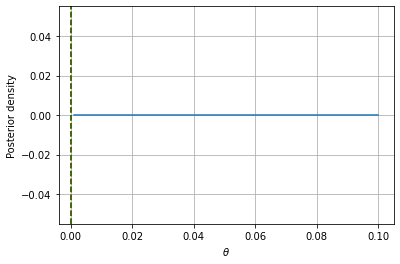

In [ ]:
Ds = np.array([16, 25, 18, 16, 11, 21, 12, 44, 65, 10])
qs = np.array([20, 20, 20, 20, 20, 30, 30, 30, 30, 30])
Xs = np.minimum( Ds, qs )

theta_MAP_censored = MAP_censored(Xs, qs)
theta_PM_censored = posterior_mean_censored(Xs, qs)

thetas = np.linspace(0.001,0.1,100)
pyplot.plot( thetas, [posterior_density_censored(t, Xs, qs) for t in thetas] )
pyplot.axvline( theta_MAP_censored, c='r', ls='--' )
pyplot.axvline( theta_PM_censored, c='g', ls='--' )

pyplot.grid(True)
pyplot.xlabel( r"$\theta$" )
pyplot.ylabel( r"Posterior density" )

print( "MAP result = %f" % theta_MAP_censored )
print( "posterior mean = %f" % theta_MAP_censored )